# Setting up Packages and Opening the CSV File

In [216]:
#Opening Packages for Future Analysis (some not used)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp


In [217]:
!pip install pingouin

In [218]:
import pingouin as pg
from pingouin import ancova

In [219]:
!pip install plotly
import plotly.express as px

In [220]:
#importing libraries for anova/ancova/logistic reg and t-tests


import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.stats.multicomp as mc

In [221]:
#opening the csv file
df = pd.read_csv("C:/Users/Liam/Desktop/INF 2178/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [222]:
df.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                               0                                1   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   SearchReason_CauseInjury  SearchReason_AssistEscape  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

   SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
0                          NaN                           NaN         NaN   
1                          NaN                           NaN         NaN   
2                          NaN                           NaN         NaN   
3                          NaN                           NaN         NaN   
4                          NaN                           NaN         NaN   

   ObjectId  
0         1  
1         2  
2         3  
3         4  
4         5  

[5 rows x 25 columns]

# Preprocessing the DataFrame, Organizing the Variables, Removing Missing Values, etc.

In [223]:
#I want to look for missing values in the dataset, as I see that there are many NaN values in the search reason categories. This is the variable I want to study, so I want to ensure there are no missing values before I analyse it.
#I can see that there are 4 missing values in race, 24 in age, and 57475 missing values in search reason (injury, escape, weapons, and evidence)
#Previously tried df. replace(np. nan,0), but it did not recognize the changes as actually zero when looking at the isnull info.


df.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [224]:
#From this, I can tell that I can use pandas.DataFrame.fillna to "Fill NA/NaN values using the specified method" (Found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
#cleaning all variables, to ensure there are no missing variables within the dataset. this will make our analysis later much easier...
#with this, we are assuming that every missing variable with "NaN" is equal to zero (0)

df = df.fillna(value = {
                'ArrestID': 0,
                'Occurrence_Category': 0,
                'Perceived_Race': 0,
                'Age_group__at_arrest_': 0,
                'SearchReason_CauseInjury': 0,
                'SearchReason_AssistEscape': 0,
                'SearchReason_PossessWeapons': 0,
                'SearchReason_PossessEvidence': 0,
                'ItemsFound': 0})
#checking df
df.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64

In [225]:
#ok, now that that is cleaned, I want to drop all the missing values, for example U in female column or missing race categories.
#Remove any other missing values.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
#this will help clean the dataset even more, such as U values in sex or missing race values!!

df = df.dropna()
df

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
0             2020    July-Sept  1005907  6017884.0    326622   
1             2020    July-Sept  1014562  6056669.0    326622   
2             2020      Oct-Dec  1029922  6057065.0    326622   
3             2021      Jan-Mar  1052190  6029059.0    327535   
4             2021      Jan-Mar  1015512  6040372.0    327535   
...            ...          ...      ...        ...       ...   
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
0                  White   M      Aged 35 to 44 years   
1                  White   M      Aged 35 to 44 years   
2      Unknown or Legacy   M      Aged 35 to 44 years   
3                  Black   M      Aged 25 to 34 years   
4            South Asian   M      Aged 25 to 34 years   
...                  ...  ..                      ...   
65271         Indigenous   F      Aged 25 to 34 years   
65272        South Asian   M      Aged 35 to 44 years   
65273              White   F      Aged 45 to 54 years   
65274  Unknown or Legacy   M  Aged 17 years and under   
65275             Latino   M      Aged 18 to 24 years   

       Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0                          Not a youth           54  ...   
1                          Not a youth           54  ...   
2                          Not a youth           54  ...   
3                          Not a youth           XX  ...   
4                          Not a youth           XX  ...   
...                                ...          ...  ...   
65271                      Not a youth           XX  ...   
65272                      Not a youth           54  ...   
65273                      Not a youth           XX  ...   
65274  Youth (aged 17 years and under)           XX  ...   
65275                      Not a youth           XX  ...   

       Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   
...                                ...                              ...   
65271                                1                                0   
65272                                0                                0   
65273                                0                                0   
65274                                0                                0   
65275                                0                                0   

      Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                                   0                                1   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
65271                               0                                0   
65272                               0                                0   
65273                               0                                0   
65274                               0                                1   
65275                               0                                1   

       SearchReason_CauseInjur

In [226]:
#checking info
#I think we are ready to move onto grouping for our research questions

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         65276 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65276 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65276 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [227]:
#rename 'aged 17 years and under' to 'aged 17 years and younger'
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 17 years and under', 'Aged 17 years and younger')

#rename 'age 65 and older' to 'aged 65 years and older'

df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 65 and older', 'Aged 65 years and older')

In [228]:
#creating continuous variable to use in ANCOVA later
#A lower score on the composite strip reason variable indicates a less harmful or powerful reason for the strip search, while a higher score indicates a more harmful or powerful reason.

df['stripreason'] = 0.5*df['SearchReason_PossessWeapons'] + 1.5*df['SearchReason_AssistEscape'] + 2*df['SearchReason_CauseInjury'] +  1*df['SearchReason_PossessEvidence'] 

In [229]:
#changing booked to arrested

df.rename(columns={'Booked':'arrested'}, inplace=True)

In [230]:
df.loc[df["arrested"] == 1,"arrested"] = "yes"
df.loc[df["arrested"] == 0,"arrested"] = "no"

In [231]:
#renaming cooperative actions and mentally unstable actions for logistic regression study later... 

#Actions_at_arrest___Cooperative to cooperative_act
df.rename(columns={'Actions_at_arrest___Cooperative':'cooperative_act'}, inplace=True)

df.loc[df["cooperative_act"] == 1,"cooperative_act"] = "yes"
df.loc[df["cooperative_act"] == 0,"cooperative_act"] = "no"


#Actions_at_arrest___Mental_inst to mental_act
df.rename(columns={'Actions_at_arrest___Mental_inst':'mental_act'}, inplace=True)

df.loc[df["mental_act"] == 1,"mental_act"] = "yes"
df.loc[df["mental_act"] == 0,"mental_act"] = "no"

In [232]:
#make df the variables of interest only

df = df[['Sex', 'StripSearch', 'Age_group__at_arrest_', 'Perceived_Race', 'cooperative_act', 'mental_act', 'stripreason', 'arrested']].copy().dropna()

df

Sex  StripSearch      Age_group__at_arrest_     Perceived_Race  \
0       M            0        Aged 35 to 44 years              White   
1       M            0        Aged 35 to 44 years              White   
2       M            0        Aged 35 to 44 years  Unknown or Legacy   
3       M            0        Aged 25 to 34 years              Black   
4       M            0        Aged 25 to 34 years        South Asian   
...    ..          ...                        ...                ...   
65271   F            0        Aged 25 to 34 years         Indigenous   
65272   M            0        Aged 35 to 44 years        South Asian   
65273   F            0        Aged 45 to 54 years              White   
65274   M            0  Aged 17 years and younger  Unknown or Legacy   
65275   M            0        Aged 18 to 24 years             Latino   

      cooperative_act mental_act  stripreason arrested  
0                 yes         no          0.0      yes  
1                  no         no          0.0      yes  
2                  no         no          0.0      yes  
3                  no         no          0.0       no  
4                  no         no          0.0      yes  
...               ...        ...          ...      ...  
65271              no         no          0.0       no  
65272              no         no          0.0      yes  
65273              no         no          0.0       no  
65274             yes         no          0.0       no  
65275             yes         no          0.0       no  

[65276 rows x 8 columns]

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    65276 non-null  object 
 1   StripSearch            65276 non-null  int64  
 2   Age_group__at_arrest_  65276 non-null  object 
 3   Perceived_Race         65276 non-null  object 
 4   cooperative_act        65276 non-null  object 
 5   mental_act             65276 non-null  object 
 6   stripreason            65276 non-null  float64
 7   arrested               65276 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.0+ MB


# Framing Research Question 1 (Strip Search, Sex, and Race)

In [234]:
#dropping blank rows in race
df = df.dropna(subset=['Perceived_Race'])

In [235]:
race_c = df['Perceived_Race'].value_counts()
print(race_c)

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
0                           4
Name: Perceived_Race, dtype: int64


In [236]:
#Removing 0 value
expected_values = ['Black', 'East/Southeast Asian', 'Indigenous', 'Latino', 'Middle-Eastern', 'South Asian', 'Unknown or Legacy', 'White']
df = df[df['Perceived_Race'].isin(expected_values)]

#checking race again
print(df['Perceived_Race'].value_counts())    #perfect, it worked!

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64


In [237]:
#see total counts of sexcolumns 
c_sex = df['Sex'].value_counts()
print(c_sex)

M    52647
F    12616
U        9
Name: Sex, dtype: int64


In [238]:
#there are 9 instances of the U variable, we want to REMOVE
df = df[df['Sex']!='U']

#checking if it was properly removed
df['Sex'].value_counts()

M    52647
F    12616
Name: Sex, dtype: int64

In [239]:
strip_c = df['StripSearch'].value_counts()
print(strip_c)

0    57463
1     7800
Name: StripSearch, dtype: int64


# Framing Research Question 2 (Actions at Arrest - Cooperative, Age, and Sex)

Sex will remain the same as above: 'c_sex'

In [240]:
action_co = df['cooperative_act'].value_counts()
print(action_co)

no     36158
yes    29105
Name: cooperative_act, dtype: int64


In [241]:
age_c = df['Age_group__at_arrest_'].value_counts()
print(age_c)

Aged 25 to 34 years          20944
Aged 35 to 44 years          16240
Aged 18 to 24 years          10038
Aged 45 to 54 years           9065
Aged 55 to 64 years           4588
Aged 17 years and younger     3042
Aged 65 years and older       1322
0                               24
Name: Age_group__at_arrest_, dtype: int64


In [242]:
#there are 24 instances of the 0 variable in age, we want to REMOVE
df = df[df['Age_group__at_arrest_']!='0']

#checking if it was properly removed
df['Age_group__at_arrest_'].value_counts()

Aged 25 to 34 years          20944
Aged 35 to 44 years          16240
Aged 18 to 24 years          10038
Aged 45 to 54 years           9065
Aged 55 to 64 years           4588
Aged 17 years and younger     3042
Aged 65 years and older       1322
0                               24
Name: Age_group__at_arrest_, dtype: int64

In [243]:
#ok, that did not work... going to do the same thing as we did with race

#Removing 0 value
expected_values = ['Aged 25 to 34 years', 'Aged 35 to 44 years', 'Aged 18 to 24 years', 'Aged 45 to 54 years', 'Aged 17 years and younger', 'Aged 65 years and older']
df = df[df['Age_group__at_arrest_'].isin(expected_values)]

#checking race again
print(df['Age_group__at_arrest_'].value_counts())    #perfect, it worked!

Aged 25 to 34 years          20944
Aged 35 to 44 years          16240
Aged 18 to 24 years          10038
Aged 45 to 54 years           9065
Aged 17 years and younger     3042
Aged 65 years and older       1322
Name: Age_group__at_arrest_, dtype: int64


# Framing Research Question 3 (Actions at Arrest - Mental Instability, Sex)

Sex will remain the same as above: 'c_sex'

In [244]:
action_me = df['mental_act'].value_counts()
print(action_me)

no     58591
yes     2060
Name: mental_act, dtype: int64


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60651 entries, 0 to 65275
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    60651 non-null  object 
 1   StripSearch            60651 non-null  int64  
 2   Age_group__at_arrest_  60651 non-null  object 
 3   Perceived_Race         60651 non-null  object 
 4   cooperative_act        60651 non-null  object 
 5   mental_act             60651 non-null  object 
 6   stripreason            60651 non-null  float64
 7   arrested               60651 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.2+ MB


# Graphs

In [246]:
df_g = df.copy()
df_g['mental_act'] = pd.get_dummies(df_g.mental_act, drop_first=True)
df_g['cooperative_act'] = pd.get_dummies(df_g.cooperative_act, drop_first=True)


df_g

Sex  StripSearch      Age_group__at_arrest_     Perceived_Race  \
0       M            0        Aged 35 to 44 years              White   
1       M            0        Aged 35 to 44 years              White   
2       M            0        Aged 35 to 44 years  Unknown or Legacy   
3       M            0        Aged 25 to 34 years              Black   
4       M            0        Aged 25 to 34 years        South Asian   
...    ..          ...                        ...                ...   
65271   F            0        Aged 25 to 34 years         Indigenous   
65272   M            0        Aged 35 to 44 years        South Asian   
65273   F            0        Aged 45 to 54 years              White   
65274   M            0  Aged 17 years and younger  Unknown or Legacy   
65275   M            0        Aged 18 to 24 years             Latino   

       cooperative_act  mental_act  stripreason arrested  
0                    1           0          0.0      yes  
1                    0           0          0.0      yes  
2                    0           0          0.0      yes  
3                    0           0          0.0       no  
4                    0           0          0.0      yes  
...                ...         ...          ...      ...  
65271                0           0          0.0       no  
65272                0           0          0.0      yes  
65273                0           0          0.0       no  
65274                1           0          0.0       no  
65275                1           0          0.0       no  

[60651 rows x 8 columns]

# Line Graph

In [247]:
px.line(df_g[df_g['StripSearch'] == 1].groupby("Perceived_Race").count(), 
       y = "StripSearch",
       title="Summation of Strip Searches by Race",
        )

In [248]:
px.line(df_g[df_g['cooperative_act'] == 1].groupby("Age_group__at_arrest_").count(), 
       y = "cooperative_act",
       title="Summation of Cooperative Actions at Arrest by Age",
        )

In [249]:
px.line(df_g[df_g['mental_act'] == 1].groupby("Perceived_Race").count(), 
       y = "mental_act",
       title="Summation of Mentally Unstable Actions at Arrest by Race",
        )

# Barplot

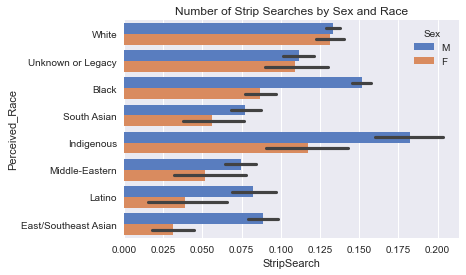

In [250]:
#using seaborn barplot to complete EDA on number of strip searches by perceived race


sns.barplot(data=df_g, x="StripSearch", y="Perceived_Race", hue="Sex").set(title='Number of Strip Searches by Sex and Race')
plt.show()

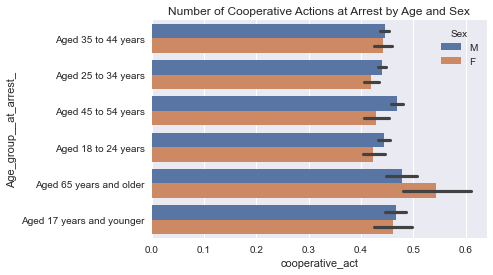

In [251]:
#Using seaborn barplot for EDA on number of actions at arrest that were cooperative by age and sex

sns.set_palette("deep")
sns.barplot(data=df_g, x="cooperative_act", y="Age_group__at_arrest_", hue="Sex").set(title='Number of Cooperative Actions at Arrest by Age and Sex')
plt.show()

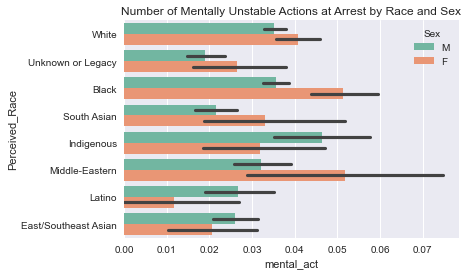

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

#RQ3
sns.set_palette("Set2")
sns.barplot(data=df_g, x="mental_act", y="Perceived_Race", hue="Sex").set(title='Number of Mentally Unstable Actions at Arrest by Race and Sex')
plt.show()

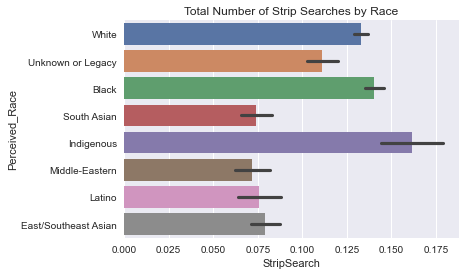

In [253]:
sns.set_palette("deep")
sns.barplot(data=df_g, x="StripSearch", y="Perceived_Race").set(title='Total Number of Strip Searches by Race')
plt.show()

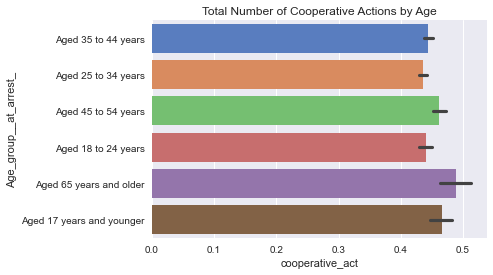

In [254]:
sns.set_palette("muted")
sns.barplot(data=df_g, x="cooperative_act", y="Age_group__at_arrest_").set(title='Total Number of Cooperative Actions by Age')
plt.show()

In [255]:
#using px and groupby, i do not think using the seaborn was grouping my variables together the way i wanted it to...
#reference: https://plotly.com/python/bar-charts/#colored-bars 

px.bar(df_g[df_g['StripSearch'] == 1].groupby(df.Perceived_Race).count(), 
       y = "StripSearch",
       title="Summation of Strip Searches by Perceived Race",
       color="Perceived_Race",
       labels={"index": "Perceived Race"})

In [256]:
#rq2 barplot
#reference: https://plotly.com/python/bar-charts/#colored-bars 

px.bar(df_g[df_g['cooperative_act'] == 1].groupby(df.Age_group__at_arrest_).count(), 
       y = "cooperative_act",
       title="Summation of Cooperative Actions at Arrest by Age",
       color="Age_group__at_arrest_",
       labels={"index": "Age"})

In [257]:
#rq3 barplot
#reference: https://plotly.com/python/bar-charts/#colored-bars 

px.bar(df_g[df_g['cooperative_act'] == 1].groupby(df.Perceived_Race).count(), 
       y = "cooperative_act",
       title="Summation of Cooperative Actions at Arrest by Race",
       color="Perceived_Race",
       labels={"index": "Race"})

In [258]:
#rq3 barplot
#reference: https://plotly.com/python/bar-charts/#colored-bars 

px.bar(df_g[df_g['mental_act'] == 1].groupby(df.Perceived_Race).count(), 
       y = "mental_act",
       title="Summation of Mentally Unstable Actions at Arrest by Race",
       color="Perceived_Race",
       labels={"index": "Race"})

# Histograms

In [259]:
#rq1

strip_plot = df_g[df_g['StripSearch'] == 1]
px.histogram(strip_plot, 
             x = "Perceived_Race", 
             y = "StripSearch", 
             color="Sex",
             title="Summation of Strip Searches by Perceived Race and Sex",
             labels={"Sex": "Sex", "Perceived_Race": "Perceived Race"})

In [260]:
#rq2

strip_plot = df_g[df_g['cooperative_act'] == 1]
px.histogram(strip_plot, 
             x = "Age_group__at_arrest_", 
             y = "cooperative_act", 
             color="Sex",
             title="Summation of Cooperative Actions at Arrest by Age and Sex",
             labels={"Sex": "Sex", "Age_group__at_arrest_": "Age at Arrest"})

In [261]:
#rq3

strip_plot = df_g[df_g['cooperative_act'] == 1]
px.histogram(strip_plot, 
             x = "Perceived_Race", 
             y = "cooperative_act", 
             title="Summation of Cooperative Actions at Arrest by Race",
             labels={"Perceived_Race": "Race"})

In [262]:
#rq4

strip_plot = df_g[df_g['mental_act'] == 1]
px.histogram(strip_plot, 
             x = "Perceived_Race", 
             y = "mental_act", 
             color="Sex",
             title="Summation of Mentally Unstable Actions at Arrest by Race and Sex",
             labels={"Sex": "Sex", "Perceived_Race": "Race"})

# T-Tests and Power Analysis

<b> creating new df <b>
    
    df for ttests = df_tt

In [263]:
#creating a new df to drop the dummies as t-testing and power analysis will not acknowledge non-dummied variables

df_tt = df.copy()
df_tt['mental_act'] = pd.get_dummies(df_tt.mental_act, drop_first=True)
df_tt['cooperative_act'] = pd.get_dummies(df_tt.cooperative_act, drop_first=True)


df_tt

Sex  StripSearch      Age_group__at_arrest_     Perceived_Race  \
0       M            0        Aged 35 to 44 years              White   
1       M            0        Aged 35 to 44 years              White   
2       M            0        Aged 35 to 44 years  Unknown or Legacy   
3       M            0        Aged 25 to 34 years              Black   
4       M            0        Aged 25 to 34 years        South Asian   
...    ..          ...                        ...                ...   
65271   F            0        Aged 25 to 34 years         Indigenous   
65272   M            0        Aged 35 to 44 years        South Asian   
65273   F            0        Aged 45 to 54 years              White   
65274   M            0  Aged 17 years and younger  Unknown or Legacy   
65275   M            0        Aged 18 to 24 years             Latino   

       cooperative_act  mental_act  stripreason arrested  
0                    1           0          0.0      yes  
1                    0           0          0.0      yes  
2                    0           0          0.0      yes  
3                    0           0          0.0       no  
4                    0           0          0.0      yes  
...                ...         ...          ...      ...  
65271                0           0          0.0       no  
65272                0           0          0.0      yes  
65273                0           0          0.0       no  
65274                1           0          0.0       no  
65275                1           0          0.0       no  

[60651 rows x 8 columns]

In [264]:
#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

def welch_dof(x, y): 
    '''
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

# TTest & Power Analysis: Strip Search

<b> creating Cohen's D formula <b>

In [265]:
#This code references the TA's lab code: https://github.com/shionguha/inf2178-expdesignfordatascience-w23/blob/main/Lab/Power_analysis_example03_13.ipynb

#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

<b> Strip Search by Race (black and white) <b>

In [266]:
#create black and white groups from new dataset 
bl = df_tt[df_tt['Perceived_Race'] == "Black"]
wh = df_tt[df_tt['Perceived_Race'] == "White"]

ss_bl = bl["StripSearch"]
ss_wh = wh["StripSearch"]


#conduct ttest
print('Ttest results for StripSearch for black and white races:',stats.ttest_ind(ss_bl, ss_wh, equal_var=False)) #p value is significant

#calculating the mean and standard deviation of stripsearch by black and white races

print('Total Mean StripSearch by Black Race and White Race:',ss_bl.mean(), ss_wh.mean())
print('Total Standard deviation StripSearch by Black Race and White Race:',ss_bl.std(), ss_wh.std())

#Black race shows a higher mean and sd, which means that black people are more likely to be stripsearched than white race 

#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(ss_bl), sms.DescrStatsW(ss_wh))
print('Confidence Interval for StripSearch by Black and White races:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for StripSearch by Black and White races:',welch_dof(ss_bl, ss_wh))

Ttest results for StripSearch for black and white races: Ttest_indResult(statistic=2.2264985954685534, pvalue=0.02598704413968744)
Total Mean StripSearch by Black Race and White Race: 0.14046644116076198 0.13283457360022285
Total Standard deviation StripSearch by Black Race and White Race: 0.3474806259162428 0.3394026130836896
Confidence Interval for StripSearch by Black and White races: (0.0009133837114353701, 0.01435035140964289)
DOF for StripSearch by Black and White races: 35549.688106120906


In [267]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(ss_bl,ss_wh)
alpha = 0.05
power = 0.8
ratio_ =len(ss_wh)/len(ss_bl) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for StripSearch for black and white races:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for ss_bl') 
print('Actual size of ss_bl:', len(ss_bl))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for ss_wh')
print('Actual size of ss_wh:', len(ss_wh))

Effect size (Cohen's D) for StripSearch for black and white races: 0.0222718995890112
Sample Size of nobs1: 26434.554 needed for ss_bl
Actual size of ss_bl: 16851
Sample Size of nobs2: 39420.445 needed for ss_wh
Actual size of ss_wh: 25129


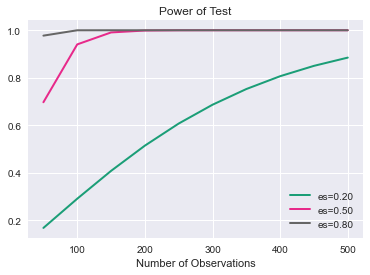

In [268]:
# Factors for power analysis
effect_size = Cohens_d(ss_bl,ss_wh)
alpha = 0.05
power = 0.8
ratio_ =len(ss_wh)/len(ss_bl) # NB: ratio = nobs2/nobs1

# Solve for sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)

# Set up effect sizes and sample sizes for power curve
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.arange(50, 501, 50)

# Plot power curve
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

<b> Strip Search by Black race and Sex <b>

In [269]:

#create sex groups from new dataset 
bl = df_tt[df_tt['Perceived_Race'] == "Black"]
bl_f = bl[bl["Sex"] == "F"]
bl_m = bl[bl["Sex"] == "M"]

ss_bl_f = bl_f["StripSearch"]
ss_bl_m = bl_m["StripSearch"]


#conduct ttest
print('Ttest results for StripSearch for Black F and Black M:',stats.ttest_ind(ss_bl_f, ss_bl_m, equal_var=False)) #p value is significant

#calculating the mean and standard deviation of mentally unst. action at arrest by black and white races

print('Total Mean StripSearch for Black F and Black M:',ss_bl_f.mean(), ss_bl_m.mean())
print('Total Standard deviation StripSearch for Black F and Black M:',ss_bl_f.std(), ss_bl_m.std())

#Black male shows a higher mean and sd, which indicates that black males are more likely to be strip searched than black females

#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(ss_bl_f), sms.DescrStatsW(ss_bl_m))
print('Confidence Interval for StripSearch for Black F and Black M:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for StripSearch for Black F and Black M:',welch_dof(ss_bl_f, ss_bl_m))

Ttest results for StripSearch for Black F and Black M: Ttest_indResult(statistic=-10.853143254600555, pvalue=3.785835023736366e-27)
Total Mean StripSearch for Black F and Black M: 0.08646616541353383 0.1518132854578097
Total Standard deviation StripSearch for Black F and Black M: 0.28109922216359556 0.3588526990155746
Confidence Interval for StripSearch for Black F and Black M: (-0.07715090246897587, -0.05354333761957587)
DOF for StripSearch for Black F and Black M: 5144.587613452474


In [270]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(ss_bl_f,ss_bl_m)
alpha = 0.05
power = 0.8
ratio_ =len(ss_bl_m)/len(ss_bl_f) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for StripSearch for black females and black males:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for ss_bl_f') 
print('Actual size of ss_bl_f:', len(ss_bl_f))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for ss_bl_m')
print('Actual size of ss_bl_m:', len(ss_bl_m))

Effect size (Cohen's D) for StripSearch for black females and black males: -0.18853318170983832
Sample Size of nobs1: 267.549 needed for ss_bl_f
Actual size of ss_bl_f: 2926
Sample Size of nobs2: 1273.282 needed for ss_bl_m
Actual size of ss_bl_m: 13925


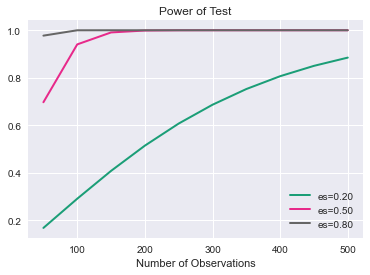

In [271]:
# Factors for power analysis
effect_size = Cohens_d(ss_bl_f,ss_bl_m)
alpha = 0.05
power = 0.8
ratio_ =len(ss_bl_m)/len(ss_bl_f) # NB: ratio = nobs2/nobs1

# Solve for sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)

# Set up effect sizes and sample sizes for power curve
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.arange(50, 501, 50)

# Plot power curve
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

<b> StripReason (covariate/control variable) by Race <b>

In [272]:
#create black and white groups from new dataset 
bl_sr = df_tt[df_tt['Perceived_Race'] == "Black"]['stripreason']
wh_sr = df_tt[df_tt['Perceived_Race'] == "White"]['stripreason']



#conduct ttest
print('Ttest results for StripReason for black and white races:',stats.ttest_ind(bl_sr, wh_sr, equal_var=False)) #p value is significant

#calculating the mean and standard deviation of stripreasons by black and white races

print('Total Mean StripReason by Black Race and White Race:',bl_sr.mean(), wh_sr.mean())
print('Total Standard deviation StripReason by Black Race and White Race:',bl_sr.std(), wh_sr.std())

#Black race shows a higher mean and sd, which means that black people are more likely to be stripsearched (or there is more reason to) than white race 

#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(bl_sr), sms.DescrStatsW(wh_sr))
print('Confidence Interval for StripReason by Black and White races:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for StripReason by Black and White races:',welch_dof(bl_sr, wh_sr))

Ttest results for StripReason for black and white races: Ttest_indResult(statistic=1.4613845119326683, pvalue=0.14391878283006976)
Total Mean StripReason by Black Race and White Race: 0.37638715803216427 0.36051971825381035
Total Standard deviation StripReason by Black Race and White Race: 1.1003779887435476 1.0755750705690654
Confidence Interval for StripReason by Black and White races: (-0.005414206900458143, 0.03714908645716598)
DOF for StripReason by Black and White races: 35567.670869371825


In [273]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(bl_sr,wh_sr)
alpha = 0.05
power = 0.8
ratio_ =len(wh_sr)/len(bl_sr) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for StripReason by Black Race and White Race:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for bl_sr') 
print('Actual size of bl_sr:', len(bl_sr))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for wh_sr')
print('Actual size of wh_sr:', len(wh_sr))

Effect size (Cohen's D) for StripReason by Black Race and White Race: 0.014616298344338488
Sample Size of nobs1: 61376.837 needed for bl_sr
Actual size of bl_sr: 16851
Sample Size of nobs2: 91528.012 needed for wh_sr
Actual size of wh_sr: 25129


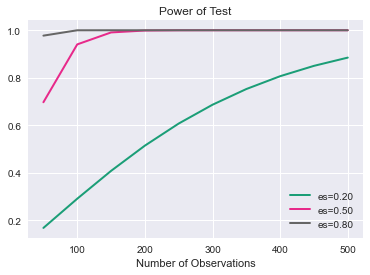

In [274]:

# Factors for power analysis
effect_size = Cohens_d(bl_sr,wh_sr)
alpha = 0.05
power = 0.8
ratio_ =len(wh_sr)/len(bl_sr) # NB: ratio = nobs2/nobs1

# Solve for sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)

# Set up effect sizes and sample sizes for power curve
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.arange(50, 501, 50)

# Plot power curve
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

# TTest & Power Analysis: Cooperative Actions

<b> Cooperative Actions at Arrest by Race (Black and White) <b>

In [275]:

#create black and white groups from new dataset 
bl = df_tt[df_tt['Perceived_Race'] == "Black"]
wh = df_tt[df_tt['Perceived_Race'] == "White"]

coop_bl = bl["cooperative_act"]
coop_wh = wh["cooperative_act"]


#conduct ttest
print('Ttest results for Cooperative Actions at Arrest for black and white races:',stats.ttest_ind(coop_bl, coop_wh, equal_var=False)) #p value is significant

#calculating the mean and standard deviation of mentally unst. action at arrest by black and white races

print('Total Mean Cooperative Actions at Arrest by Black Race and White Race:',coop_bl.mean(), coop_wh.mean())
print('Total Standard deviation Cooperative Actions at Arrest by Black Race and White Race:',coop_bl.std(), coop_wh.std())

#Black race shows a lower mean and sd, which means that black people are less likely to display cooperative actions at the time of their arrest than white race 

#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(coop_bl), sms.DescrStatsW(coop_wh))
print('Confidence Interval for Cooperative Actions at Arrest by Black and White races:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for Cooperative Actions at Arrest by Black and White races:',welch_dof(coop_bl, coop_wh))

Ttest results for Cooperative Actions at Arrest for black and white races: Ttest_indResult(statistic=-3.866123448250877, pvalue=0.00011077175017947087)
Total Mean Cooperative Actions at Arrest by Black Race and White Race: 0.4246038810753071 0.4436706593975089
Total Standard deviation Cooperative Actions at Arrest by Black Race and White Race: 0.49429740509419956 0.4968267587145763
Confidence Interval for Cooperative Actions at Arrest by Black and White races: (-0.02873316557635415, -0.009400391068049394)
DOF for Cooperative Actions at Arrest by Black and White races: 36255.75183860687


In [276]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(coop_bl,coop_wh)
alpha = 0.05
power = 0.8
ratio_ =len(coop_wh)/len(coop_bl) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Cooperative Actions at Arrest for black and white races:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for coop_bl') 
print('Actual size of coop_bl:', len(coop_bl))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for coop_wh')
print('Actual size of coop_wh:', len(coop_wh))

Effect size (Cohen's D) for Cooperative Actions at Arrest for black and white races: -0.03845558180131194
Sample Size of nobs1: 8867.329 needed for coop_bl
Actual size of coop_bl: 16851
Sample Size of nobs2: 13223.377 needed for coop_wh
Actual size of coop_wh: 25129


<b> Cooperative Actions at Arrest by Age (25 to 34) and Sex <b>

In [277]:
#making variables for age, cooperation, and sex

ag = df_tt[df_tt['Age_group__at_arrest_'] == "Aged 25 to 34 years"]
ag_f = ag[ag["Sex"] == "F"]
ag_m = ag[ag["Sex"] == "M"]

#now adding both of these variables with stripsearch
coop_ag_f = ag_f["cooperative_act"]
coop_ag_m = ag_m["cooperative_act"]


#conduct ttest
print('Ttest results for Cooperative Actions at Arrest for Sex and Age 25 to 34 yrs:',stats.ttest_ind(coop_ag_f, coop_ag_m, equal_var=False)) #p value is significant

#calculating the mean and standard deviation of cooperative action at arrest by black and white races

print('Total Mean Cooperative Actions at Arrest by Female and Male Aged 25 to 34 yrs:',coop_ag_f.mean(), coop_ag_m.mean())
print('Total Standard deviation Cooperative Actions at Arrest by Female and Male Aged 25 to 24 yrs:',coop_ag_f.std(), coop_ag_m.std())

#Male at this age indicates a higher mean and sd, surprisingly males tend to display more cooperative actions at the time of their arrest

#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(coop_ag_f), sms.DescrStatsW(coop_ag_m))
print('Confidence Interval for Cooperative Actions at Arrest by Female and Male Aged 25 to 24 yrs:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for Cooperative Actions at Arrest by Female and Male Aged 25 to 34 yrs:',welch_dof(coop_ag_f, coop_ag_m))

Ttest results for Cooperative Actions at Arrest for Sex and Age 25 to 34 yrs: Ttest_indResult(statistic=-2.444007020033321, pvalue=0.014551288244555897)
Total Mean Cooperative Actions at Arrest by Female and Male Aged 25 to 34 yrs: 0.4193853427895981 0.4401699174344861
Total Standard deviation Cooperative Actions at Arrest by Female and Male Aged 25 to 24 yrs: 0.493516824402786 0.4964223055553709
Confidence Interval for Cooperative Actions at Arrest by Female and Male Aged 25 to 24 yrs: (-0.037455775384972655, -0.004113373904803298)
DOF for Cooperative Actions at Arrest by Female and Male Aged 25 to 34 yrs: 6563.245066993772


In [278]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(coop_ag_f,coop_ag_m)
alpha = 0.05
power = 0.8
ratio_ =len(coop_ag_m)/len(coop_ag_f) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Cooperative Actions at Arrest by Female and Male Aged 25 to 24:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for coop_ag_f') 
print('Actual size of coop_ag_f:', len(coop_ag_f))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for coop_ag_m')
print('Actual size of coop_ag_m:', len(coop_ag_m))

Effect size (Cohen's D) for Cooperative Actions at Arrest by Female and Male Aged 25 to 24: -0.041918164250636415
Sample Size of nobs1: 5597.723 needed for coop_ag_f
Actual size of coop_ag_f: 4230
Sample Size of nobs2: 22118.286 needed for coop_ag_m
Actual size of coop_ag_m: 16714


<b> Cooperative Actions at Arrest by Sex <b>

In [279]:
#create sex groups from new dataset 
f = df_tt[df_tt['Sex'] == "F"]
m = df_tt[df_tt['Sex'] == "M"]

coop_f = f["cooperative_act"]
coop_m = m["cooperative_act"]


#conduct ttest
print('Ttest results for Cooperative Actions at Arrest for Sex:',stats.ttest_ind(coop_f, coop_m, equal_var=False)) #p value is significant

#calculating the mean and standard deviation of cooperative action at arrest by black and white races

print('Total Mean Cooperative Actions at Arrest by Female and Male:',coop_f.mean(), coop_m.mean())
print('Total Standard deviation Cooperative Actions at Arrest by Female and Male:',coop_f.std(), coop_m.std())

#Male indicates a higher mean and sd, surprisingly males tend to display more cooperative actions at the time of their arrest

#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(coop_f), sms.DescrStatsW(coop_m))
print('Confidence Interval for Cooperative Actions at Arrest by Female and Male:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for Cooperative Actions at Arrest by Female and Male:',welch_dof(coop_f, coop_m))

Ttest results for Cooperative Actions at Arrest for Sex: Ttest_indResult(statistic=-3.296037245815191, pvalue=0.000982459098346186)
Total Mean Cooperative Actions at Arrest by Female and Male: 0.431924882629108 0.4486176959546826
Total Standard deviation Cooperative Actions at Arrest by Female and Male: 0.49536486622617365 0.4973579553956898
Confidence Interval for Cooperative Actions at Arrest by Female and Male: (-0.026619728087717415, -0.006765898563431776)
DOF for Cooperative Actions at Arrest by Female and Male: 18267.885147599573


In [280]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(coop_f,coop_m)
alpha = 0.05
power = 0.8
ratio_ =len(coop_m)/len(coop_f) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Cooperative Actions at Arrest by Female and Male:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for coop_f') 
print('Actual size of coop_f:', len(coop_f))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for coop_m')
print('Actual size of coop_m:', len(coop_m))

Effect size (Cohen's D) for Cooperative Actions at Arrest by Female and Male: -0.033589404599385156
Sample Size of nobs1: 8660.140 needed for coop_f
Actual size of coop_f: 11928
Sample Size of nobs2: 35374.579 needed for coop_m
Actual size of coop_m: 48723


<b> Arrested vs Cooperative Actions <b>

In [281]:
#creating groups indicating if ppl were arrested according to their cooperation

arr_c_yes = df_tt[df_tt["arrested"] == "yes"]['cooperative_act']
arr_c_no = df_tt[df_tt["arrested"] == "no"]['cooperative_act']


#conduct ttest
print('Ttest results for Cooperative Actions at Arrest, Arrested - Yes, No:',stats.ttest_ind(arr_c_yes, arr_c_no, equal_var=False)) #p value is significant

#calculating the mean and standard deviation of the groups

print('Total Mean Cooperative Actions at Arrest, Arrested - Yes, No:',arr_c_yes.mean(), arr_c_no.mean())
print('Total Standard deviation Cooperative Actions at Arrest, Arrested - Yes, No:',arr_c_yes.std(), arr_c_no.std())


#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(arr_c_yes), sms.DescrStatsW(arr_c_no))
print('Confidence Interval for Cooperative Actions at Arrest, Arrested - Yes, No:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for Cooperative Actions at Arrest, Arrested - Yes, No:',welch_dof(arr_c_yes, arr_c_no))

Ttest results for Cooperative Actions at Arrest, Arrested - Yes, No: Ttest_indResult(statistic=13.66031469822181, pvalue=2.0273108873746813e-42)
Total Mean Cooperative Actions at Arrest, Arrested - Yes, No: 0.471539090508837 0.4164558278168648
Total Standard deviation Cooperative Actions at Arrest, Arrested - Yes, No: 0.4991971689954315 0.4929795069710082
Confidence Interval for Cooperative Actions at Arrest, Arrested - Yes, No: (0.047179829756326695, 0.06298669562761776)
DOF for Cooperative Actions at Arrest, Arrested - Yes, No: 60216.96175323786


In [282]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(arr_c_yes,arr_c_no)
alpha = 0.05
power = 0.8
ratio_ =len(arr_c_no)/len(arr_c_yes) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Cooperative Actions at Arrest:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for arr_c_yes') 
print('Actual size of arr_c_yes:', len(arr_c_yes))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for arr_c_no')
print('Actual size of arr_c_no:', len(arr_c_no))

Effect size (Cohen's D) for Cooperative Actions at Arrest: 0.11099923902943858
Sample Size of nobs1: 1340.110 needed for arr_c_yes
Actual size of arr_c_yes: 31798
Sample Size of nobs2: 1215.994 needed for arr_c_no
Actual size of arr_c_no: 28853


# TTest & Power Analysis: Mental Instability Actions

<b> Mentally Unstable Actions at Arrest by Race <b> 

In [283]:

#create black and white groups from new dataset 
bl = df_tt[df_tt['Perceived_Race'] == "Black"]
wh = df_tt[df_tt['Perceived_Race'] == "White"]

ment_bl = bl["mental_act"]
ment_wh = wh["mental_act"]


#conduct ttest
print('Ttest results for Mentally Unstable Actions at Arrest for black and white races:',stats.ttest_ind(ment_bl, ment_wh, equal_var=False)) #p value is NOT significant

#calculating the mean and standard deviation of mentally unst. action at arrest by black and white races

print('Total Mean Mentally Unstable Actions at Arrest by Black Race and White Race:',ment_bl.mean(), ment_wh.mean())
print('Total Standard deviation Mentally Unstable Actions at Arrest by Black Race and White Race:',ment_bl.std(), ment_wh.std())

#White race indicates black race has a higher mean and sd, therefore black race is more likely to display mentally unstable actions at arrest... 

#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(ment_bl), sms.DescrStatsW(ment_wh))
print('Confidence Interval for Mentally Unstable Actions at Arrest by Black and White races:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for mentally unstable Actions at Arrest by Black and White races:',welch_dof(ment_bl, ment_wh))

Ttest results for Mentally Unstable Actions at Arrest for black and white races: Ttest_indResult(statistic=0.9737710984964296, pvalue=0.3301768328746951)
Total Mean Mentally Unstable Actions at Arrest by Black Race and White Race: 0.038336003797994185 0.03649170281348243
Total Standard deviation Mentally Unstable Actions at Arrest by Black Race and White Race: 0.19201182912782896 0.18751388662574486
Confidence Interval for Mentally Unstable Actions at Arrest by Black and White races: (-0.001867953983814528, 0.005556555952838042)
DOF for mentally unstable Actions at Arrest by Black and White races: 35545.15864966718


In [284]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(ment_bl,ment_wh)
alpha = 0.05
power = 0.8
ratio_ =len(ment_wh)/len(ment_bl) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Mentally Unstable Actions at Arrest by Black Race and White Race:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for ment_bl') 
print('Actual size of ment_bl:', len(ment_bl))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for ment_wh')
print('Actual size of ment_wh:', len(ment_wh))

Effect size (Cohen's D) for Mentally Unstable Actions at Arrest by Black Race and White Race: 0.009741084523051413
Sample Size of nobs1: 138185.236 needed for ment_bl
Actual size of ment_bl: 16851
Sample Size of nobs2: 206068.293 needed for ment_wh
Actual size of ment_wh: 25129


<b> Mentally Unstable Actions at Arrest by Black Race and Sex <b>

In [285]:

#create sex groups from new dataset 
bl = df_tt[df_tt['Perceived_Race'] == "Black"]
bl_f = bl[bl["Sex"] == "F"]
bl_m = bl[bl["Sex"] == "M"]

ment_bl_f = f["mental_act"]
ment_bl_m = m["mental_act"]


#conduct ttest
print('Ttest results for Mentally Unstable Actions at Arrest for Sex:',stats.ttest_ind(ment_bl_f, ment_bl_m, equal_var=False)) #p value is significant

#calculating the mean and standard deviation of mentally unst. action at arrest by black and white races

print('Total Mean Mentally Unstable Actions at Arrest by Female and Male:',ment_bl_f.mean(), ment_bl_m.mean())
print('Total Standard deviation Mentally Unstable Actions at Arrest by Female and Male:',ment_bl_f.std(), ment_bl_m.std())

#Male indicates a lower mean and sd, which means that females are more likely to display actions associated with mental instability at the time of their arrest

#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(ment_bl_f), sms.DescrStatsW(ment_bl_m))
print('Confidence Interval for Mentally Unstable Actions at Arrest by Female and Male:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for mentally unstable Actions at Arrest by Female and Male:',welch_dof(ment_bl_f, ment_bl_m))

Ttest results for Mentally Unstable Actions at Arrest for Sex: Ttest_indResult(statistic=3.8655617125600297, pvalue=0.0001112457912183014)
Total Mean Mentally Unstable Actions at Arrest by Female and Male: 0.04007377598926895 0.032469265028836486
Total Standard deviation Mentally Unstable Actions at Arrest by Female and Male: 0.1961404949095578 0.1772446237214516
Confidence Interval for Mentally Unstable Actions at Arrest by Female and Male: (0.0037485051375052997, 0.01146051678335963)
DOF for mentally unstable Actions at Arrest by Female and Male: 17006.065100855038


In [286]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(ment_bl_f,ment_bl_m)
alpha = 0.05
power = 0.8
ratio_ =len(ment_bl_m)/len(ment_bl_f) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Mentally Unstable Actions at Arrest by Black Female and Black Male:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for ment_bl_f') 
print('Actual size of ment_bl_f:', len(ment_bl_f))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for ment_bl_m')
print('Actual size of ment_bl_m:', len(ment_bl_m))

Effect size (Cohen's D) for Mentally Unstable Actions at Arrest by Black Female and Black Male: 0.04198687023402831
Sample Size of nobs1: 5542.595 needed for ment_bl_f
Actual size of ment_bl_f: 11928
Sample Size of nobs2: 22640.163 needed for ment_bl_m
Actual size of ment_bl_m: 48723


<b> Arrested vs. mental instability <b>

In [287]:
#creating groups indicating if ppl were arrested according to their mental instability

arr_yes = df_tt[df_tt["arrested"] == "yes"]['mental_act']
arr_no = df_tt[df_tt["arrested"] == "no"]['mental_act']


#conduct ttest
print('Ttest results for Mentally Unstable Actions at Arrest, Arrested - Yes, No:',stats.ttest_ind(arr_yes, arr_no, equal_var=False)) #p value is NOT significant

#calculating the mean and standard deviation of the groups

print('Total Mean Mentally Unstable Actions at Arrest, Arrested - Yes, No:',arr_yes.mean(), arr_no.mean())
print('Total Standard deviation Mentally Unstable Actions at Arrest, Arrested - Yes, No:',arr_yes.std(), arr_no.std())


#Compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(arr_yes), sms.DescrStatsW(arr_no))
print('Confidence Interval for Mentally Unstable Actions at Arrest, Arrested - Yes, No:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for mentally unstable Actions at Arrest, Arrested - Yes, No:',welch_dof(arr_yes, arr_no))

Ttest results for Mentally Unstable Actions at Arrest, Arrested - Yes, No: Ttest_indResult(statistic=24.650489598085265, pvalue=2.201717033382472e-133)
Total Mean Mentally Unstable Actions at Arrest, Arrested - Yes, No: 0.05072646078369709 0.015492323155304475
Total Standard deviation Mentally Unstable Actions at Arrest, Arrested - Yes, No: 0.21944202276964114 0.12350238750000954
Confidence Interval for Mentally Unstable Actions at Arrest, Arrested - Yes, No: (0.03243259979916772, 0.03803567545761751)
DOF for mentally unstable Actions at Arrest, Arrested - Yes, No: 51019.252184561425


In [288]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower

#factors for power analysis
effect_size = Cohens_d(arr_yes,arr_no)
alpha = 0.05
power = 0.8
ratio_ =len(arr_no)/len(arr_yes) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Mentally Unstable Actions at Arrest, Arrested - Yes, No:',effect_size)

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for arr_yes') 
print('Actual size of arr_yes:', len(arr_yes))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for arr_no')
print('Actual size of arr_no:', len(arr_no))

Effect size (Cohen's D) for Mentally Unstable Actions at Arrest, Arrested - Yes, No: 0.1954358664030018
Sample Size of nobs1: 432.971 needed for arr_yes
Actual size of arr_yes: 31798
Sample Size of nobs2: 392.871 needed for arr_no
Actual size of arr_no: 28853


# ANCOVA on StripSearch 
Using Strip Search as the DV, stripreason as the covariate, and race and sex as the independent variables...

Context: I created a new continuous covariate called 'stripreason' by combining three binary variables that represent different reasons for police searches. The values of these variables were weighted and summed to produce a continuous variable that can potentially predict the likelihood of a strip search, which is the dependent variable in my analysis.

I want to explore the relationship between the reasons for police searches and the likelihood of a strip search.

In [289]:
df

Sex  StripSearch      Age_group__at_arrest_     Perceived_Race  \
0       M            0        Aged 35 to 44 years              White   
1       M            0        Aged 35 to 44 years              White   
2       M            0        Aged 35 to 44 years  Unknown or Legacy   
3       M            0        Aged 25 to 34 years              Black   
4       M            0        Aged 25 to 34 years        South Asian   
...    ..          ...                        ...                ...   
65271   F            0        Aged 25 to 34 years         Indigenous   
65272   M            0        Aged 35 to 44 years        South Asian   
65273   F            0        Aged 45 to 54 years              White   
65274   M            0  Aged 17 years and younger  Unknown or Legacy   
65275   M            0        Aged 18 to 24 years             Latino   

      cooperative_act mental_act  stripreason arrested  
0                 yes         no          0.0      yes  
1                  no         no          0.0      yes  
2                  no         no          0.0      yes  
3                  no         no          0.0       no  
4                  no         no          0.0      yes  
...               ...        ...          ...      ...  
65271              no         no          0.0       no  
65272              no         no          0.0      yes  
65273              no         no          0.0       no  
65274             yes         no          0.0       no  
65275             yes         no          0.0       no  

[60651 rows x 8 columns]

In [290]:
#testing stripreason to ensure it works as a covariate for ANCOVA
df['stripreason'].unique()

array([0. , 4. , 2. , 1.5, 2.5, 5. , 3. , 3.5, 4.5, 1. , 0.5])

In [291]:
#one-way ancova: strip-search, stripreason, and sex

ancova(data=df, dv='StripSearch', covar='stripreason', between='Sex')

Source           SS     DF              F     p-unc       np2
0          Sex     0.078788      1       2.701038  0.100288  0.000045
1  stripreason  4752.128640      1  162914.767928  0.000000  0.728720
2     Residual  1769.066742  60648            NaN       NaN       NaN

In [292]:
#one-way ancova: strip-search, stripreason, and sex

ancova(data=df, dv='StripSearch', covar='stripreason', between='Perceived_Race')

Source           SS     DF              F         p-unc       np2
0  Perceived_Race     2.546968      7      12.489960  4.285598e-16  0.001440
1     stripreason  4720.642257      1  162045.409664  0.000000e+00  0.727681
2        Residual  1766.598562  60642            NaN           NaN       NaN

In [293]:
# Perform the ANCOVA for all the variables (race and sex together)
#i think this is incorrect, so I will leave out of the writeup... 

model = ols('StripSearch ~ C(Sex) + C(Perceived_Race) + stripreason', data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.815e+04
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:36:38   Log-Likelihood:                 21176.
No. Observations:               60651   AIC:                        -4.233e+04
Df Residuals:                   60641   BIC:                        -4.224e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

# Logistic Regression

<b> Logistic Regression on Cooperative Actions at Arrest <b>

In [294]:
df

Sex  StripSearch      Age_group__at_arrest_     Perceived_Race  \
0       M            0        Aged 35 to 44 years              White   
1       M            0        Aged 35 to 44 years              White   
2       M            0        Aged 35 to 44 years  Unknown or Legacy   
3       M            0        Aged 25 to 34 years              Black   
4       M            0        Aged 25 to 34 years        South Asian   
...    ..          ...                        ...                ...   
65271   F            0        Aged 25 to 34 years         Indigenous   
65272   M            0        Aged 35 to 44 years        South Asian   
65273   F            0        Aged 45 to 54 years              White   
65274   M            0  Aged 17 years and younger  Unknown or Legacy   
65275   M            0        Aged 18 to 24 years             Latino   

      cooperative_act mental_act  stripreason arrested  
0                 yes         no          0.0      yes  
1                  no         no          0.0      yes  
2                  no         no          0.0      yes  
3                  no         no          0.0       no  
4                  no         no          0.0      yes  
...               ...        ...          ...      ...  
65271              no         no          0.0       no  
65272              no         no          0.0      yes  
65273              no         no          0.0       no  
65274             yes         no          0.0       no  
65275             yes         no          0.0       no  

[60651 rows x 8 columns]

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60651 entries, 0 to 65275
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    60651 non-null  object 
 1   StripSearch            60651 non-null  int64  
 2   Age_group__at_arrest_  60651 non-null  object 
 3   Perceived_Race         60651 non-null  object 
 4   cooperative_act        60651 non-null  object 
 5   mental_act             60651 non-null  object 
 6   stripreason            60651 non-null  float64
 7   arrested               60651 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.2+ MB


In [302]:
#making a new df for first logistic regression...
#referencing TA lab: https://github.com/shionguha/inf2178-expdesignfordatascience-w23/blob/main/Lab/Logistic_regression.ipynb

x = df[['Perceived_Race', 'Age_group__at_arrest_', 'Sex', 'arrested']].copy()
x['arrested'] = pd.get_dummies(df.arrested, drop_first=True)

# Select the response column 
y = pd.get_dummies(df.cooperative_act, drop_first=True)

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60651 entries, 0 to 65275
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Perceived_Race         60651 non-null  object
 1   Age_group__at_arrest_  60651 non-null  object
 2   Sex                    60651 non-null  object
 3   arrested               60651 non-null  uint8 
dtypes: object(3), uint8(1)
memory usage: 3.9+ MB


In [303]:
#assuming 0 indicates non-cooperative actions, and 1 indicates cooperative actions

x.groupby('arrested').size()

arrested
0    28853
1    31798
dtype: int64

In [304]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60651 entries, 0 to 65275
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Perceived_Race         60651 non-null  object
 1   Age_group__at_arrest_  60651 non-null  object
 2   Sex                    60651 non-null  object
 3   arrested               60651 non-null  uint8 
dtypes: object(3), uint8(1)
memory usage: 3.9+ MB


In [305]:
x.value_counts()

Perceived_Race  Age_group__at_arrest_      Sex  arrested
White           Aged 25 to 34 years        M    1           3487
                Aged 35 to 44 years        M    1           3389
Black           Aged 25 to 34 years        M    1           3129
White           Aged 25 to 34 years        M    0           2761
                Aged 35 to 44 years        M    0           2685
                                                            ... 
South Asian     Aged 65 years and older    F    1              2
Latino          Aged 65 years and older    F    1              2
Indigenous      Aged 65 years and older    F    1              1
                Aged 17 years and younger  F    1              1
Latino          Aged 17 years and younger  F    1              1
Length: 190, dtype: int64

In [306]:
y['yes'].unique()

array([1, 0], dtype=uint8)

In [307]:
#importing statsmodels
import statsmodels.formula.api as smf


# Create the formula string 
all_columns = ' + '.join(x)
formula = "yes ~ " + all_columns 
print("Formula: ", formula, "\n")

data = pd.concat([x,y], axis = 1)

# Build the model
log_reg = smf.logit(formula, data=data).fit()

Formula:  yes ~ Perceived_Race + Age_group__at_arrest_ + Sex + arrested 

Optimization terminated successfully.
         Current function value: 0.683814
         Iterations 4


In [308]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                60651
Model:                          Logit   Df Residuals:                    60636
Method:                           MLE   Df Model:                           14
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.004868
Time:                        11:37:10   Log-Likelihood:                -41474.
converged:                       True   LL-Null:                       -41677.
Covariance Type:            nonrobust   LLR p-value:                 7.858e-78
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -0.3346      0.042     -8.021      0.000      -0.416      -0.253
Perceived_Race[T.East/Southeast Asian]               0.3832      0.035     10.833      0.000       0.314       0.453
Perceived_Race[T.Indigenous]                        -0.1086      0.050     -2.153      0.031      -0.207      -0.010
Perceived_Race[T.Latino]                             0.3360      0.051      6.539      0.000       0.235       0.437
Perceived_Race[T.Middle-Eastern]                     0.1691      0.040      4.273      0.000       0.092       0.247
Perceived_Race[T.South Asian]                        0.1632      0.038      4.286      0.000       0.089       0.238
Perceived_Race[T.Unknown or Legacy]                  0.0781      0.033      2.335      0.020       0.013       0.144
Perceived_Race[T.White]                              0.0804      0.021      3.904      0.000       0.040       0.121
Age_group__at_arrest_[T.Aged 18 to 24 years]        -0.1467      0.042     -3.512      0.000      -0.229      -0.065
Age_group__at_arrest_[T.Aged 25 to 34 years]        -0.1628      0.039     -4.149      0.000      -0.240      -0.086
Age_group__at_arrest_[T.Aged 35 to 44 years]        -0.1347      0.040     -3.362      0.001      -0.213      -0.056
Age_group__at_arrest_[T.Aged 45 to 54 years]        -0.0608      0.043     -1.431      0.152      -0.144       0.022
Age_group__at_arrest_[T.Aged 65 years and older]     0.0526      0.066      0.791      0.429      -0.078       0.183
Sex[T.M]                                             0.0320      0.021      1.531      0.126      -0.009       0.073
arrested                                             0.2368      0.017     14.301      0.000       0.204       0.269
====================================================================================================================
"""

In [309]:
# gettinghmg odds ratio
np.exp(log_reg.params)

Intercept                                           0.715597
Perceived_Race[T.East/Southeast Asian]              1.466959
Perceived_Race[T.Indigenous]                        0.897087
Perceived_Race[T.Latino]                            1.399300
Perceived_Race[T.Middle-Eastern]                    1.184272
Perceived_Race[T.South Asian]                       1.177312
Perceived_Race[T.Unknown or Legacy]                 1.081215
Perceived_Race[T.White]                             1.083739
Age_group__at_arrest_[T.Aged 18 to 24 years]        0.863567
Age_group__at_arrest_[T.Aged 25 to 34 years]        0.849794
Age_group__at_arrest_[T.Aged 35 to 44 years]        0.873965
Age_group__at_arrest_[T.Aged 45 to 54 years]        0.940970
Age_group__at_arrest_[T.Aged 65 years and older]    1.053962
Sex[T.M]                                            1.032490
arrested                                            1.267198
dtype: float64

In [310]:
#computing odds ratio and confidence intervals for the coefficients in this model

params = log_reg.params
conf = log_reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

Lower CI  Upper CI        OR
Intercept                                         0.659410  0.776571  0.715597
Perceived_Race[T.East/Southeast Asian]            1.368702  1.572270  1.466959
Perceived_Race[T.Indigenous]                      0.812657  0.990290  0.897087
Perceived_Race[T.Latino]                          1.265242  1.547562  1.399300
Perceived_Race[T.Middle-Eastern]                  1.095880  1.279794  1.184272
Perceived_Race[T.South Asian]                     1.092622  1.268566  1.177312
Perceived_Race[T.Unknown or Legacy]               1.012619  1.154457  1.081215
Perceived_Race[T.White]                           1.040860  1.128385  1.083739
Age_group__at_arrest_[T.Aged 18 to 24 years]      0.795695  0.937227  0.863567
Age_group__at_arrest_[T.Aged 25 to 34 years]      0.786900  0.917714  0.849794
Age_group__at_arrest_[T.Aged 35 to 44 years]      0.807960  0.945361  0.873965
Age_group__at_arrest_[T.Aged 45 to 54 years]      0.865739  1.022740  0.940970
Age_group__at_arrest_[T.Aged 65 years and older]  0.925204  1.200639  1.053962
Sex[T.M]                                          0.991090  1.075619  1.032490
arrested                                          1.226732  1.308999  1.267198


Test accuracy =  0.5582392218283736

Confusion Matrix : 
 [[6299  438]
 [4921  473]]


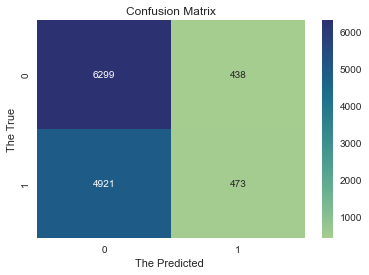

In [311]:
#assess the model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

#conducting the train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

# Predict responses 
pred_1 = log_reg.predict(x_test)


# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))



#confusion matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


#make a graph for the confusion matrix
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(cm, annot=True, cmap='crest', fmt='g')

#plotting the labels and titles for the axis of the graph
plt.xlabel('The Predicted ')
plt.ylabel('The True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Prediction Interval for Logistic Regression 1

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60651 entries, 0 to 65275
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    60651 non-null  object 
 1   StripSearch            60651 non-null  int64  
 2   Age_group__at_arrest_  60651 non-null  object 
 3   Perceived_Race         60651 non-null  object 
 4   cooperative_act        60651 non-null  object 
 5   mental_act             60651 non-null  object 
 6   stripreason            60651 non-null  float64
 7   arrested               60651 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.2+ MB


In [312]:
# Prediction interval for all variables based on formula
from scipy.stats import norm
coeff = log_reg.params.values
std_error = log_reg.bse.values
conf_level = 0.95
critical_val = norm.ppf((1 + conf_level) / 2)
mar = critical_val * std_error
upper_p_i = critical_val + mar
lower_p_i = critical_val - mar

In [328]:
# Form into a table
pred_lu = log_reg.conf_int()
pred_lu.columns = ["Lower PI", "Upper PI"]
for i in range(len(coeff)):
  pred_lu["Lower PI"][i] = np.exp(lower_p_i)[i]
  pred_lu["Upper PI"][i] = np.exp(upper_p_i)[i]
pred_lu

Lower PI  Upper PI
Intercept                                         6.541672  7.703965
Perceived_Race[T.East/Southeast Asian]            6.623575  7.608703
Perceived_Race[T.Indigenous]                      6.430934  7.836624
Perceived_Race[T.Latino]                          6.418956  7.851248
Perceived_Race[T.Middle-Eastern]                  6.569207  7.671674
Perceived_Race[T.South Asian]                     6.588401  7.649324
Perceived_Race[T.Unknown or Legacy]               6.648685  7.579967
Perceived_Race[T.White]                           6.818189  7.391525
Age_group__at_arrest_[T.Aged 18 to 24 years]      6.541125  7.704610
Age_group__at_arrest_[T.Aged 25 to 34 years]      6.573666  7.666470
Age_group__at_arrest_[T.Aged 35 to 44 years]      6.562928  7.679014
Age_group__at_arrest_[T.Aged 45 to 54 years]      6.531491  7.715974
Age_group__at_arrest_[T.Aged 65 years and older]  6.231808  8.087029
Sex[T.M]                                          6.814418  7.395615
arrested                                          6.872372  7.333249

In [354]:
import numpy as np
np.set_printoptions(formatter={'all': str})
import pandas as pd
pd.options.display.float_format = "{:.4f}".format
from scipy.stats import t
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')

df_pred = df.copy()
df_pred = df_pred.dropna()


df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60651 entries, 0 to 65275
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    60651 non-null  object 
 1   StripSearch            60651 non-null  int64  
 2   Age_group__at_arrest_  60651 non-null  object 
 3   Perceived_Race         60651 non-null  int32  
 4   cooperative_act        60651 non-null  object 
 5   mental_act             60651 non-null  object 
 6   stripreason            60651 non-null  float64
 7   arrested               60651 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 5.9+ MB


In [355]:
df_pred.isnull().sum()

Sex                      0
StripSearch              0
Age_group__at_arrest_    0
Perceived_Race           0
cooperative_act          0
mental_act               0
stripreason              0
arrested                 0
dtype: int64

In [356]:
train, test = train_test_split(df, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='cooperative_act'), df['cooperative_act'], test_size=0.1, 
    random_state=42
)
x_train = X_train['Sex']
x_test = X_test['Sex']
print(f"X_train shape: {X_train.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(train[['cooperative_act']].describe().T)
print(f"X_test shape: {X_test.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
test[['cooperative_act']].describe().T

X_train shape: (54585, 7)
x_train shape: (54585,)
y_train shape: (54585,)

========== Training data ==========


count unique top   freq
cooperative_act  54585      2  no  30236

X_test shape: (6066, 7)
x_test shape: (6066,)
y_test shape: (6066,)

========== Test data ==========


count unique top  freq
cooperative_act  6066      2  no  3405

In [357]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(model.predict(x_test.values.reshape(-1, 1))[:5])

ValueError: could not convert string to float: 'M'

<b> Logistic Regression on Mental Instability at Arrest <b>

In [438]:
df

Sex  StripSearch      Age_group__at_arrest_     Perceived_Race  \
0       M            0        Aged 35 to 44 years              White   
1       M            0        Aged 35 to 44 years              White   
2       M            0        Aged 35 to 44 years  Unknown or Legacy   
3       M            0        Aged 25 to 34 years              Black   
4       M            0        Aged 25 to 34 years        South Asian   
...    ..          ...                        ...                ...   
65271   F            0        Aged 25 to 34 years         Indigenous   
65272   M            0        Aged 35 to 44 years        South Asian   
65273   F            0        Aged 45 to 54 years              White   
65274   M            0  Aged 17 years and younger  Unknown or Legacy   
65275   M            0        Aged 18 to 24 years             Latino   

      cooperative_act mental_act  stripreason arrested  
0                 yes         no       0.0000      yes  
1                  no         no       0.0000      yes  
2                  no         no       0.0000      yes  
3                  no         no       0.0000       no  
4                  no         no       0.0000      yes  
...               ...        ...          ...      ...  
65271              no         no       0.0000       no  
65272              no         no       0.0000      yes  
65273              no         no       0.0000       no  
65274             yes         no       0.0000       no  
65275             yes         no       0.0000       no  

[60651 rows x 8 columns]

In [439]:
z = df[['Perceived_Race', 'Sex', 'arrested']].copy()
z['arrested'] = pd.get_dummies(df.arrested, drop_first=True)

# Select the response column 
y = pd.get_dummies(df.mental_act, drop_first=True)

z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60651 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Perceived_Race  60651 non-null  object
 1   Sex             60651 non-null  object
 2   arrested        60651 non-null  uint8 
dtypes: object(2), uint8(1)
memory usage: 3.5+ MB


In [440]:
#assuming 0 indicates non-mental actions, and 1 indicates mentally unstable actions

z.groupby('arrested').size()

arrested
0    28853
1    31798
dtype: int64

In [441]:
y['yes'].unique()

array([0, 1], dtype=uint8)

In [442]:
#importing statsmodels
import statsmodels.formula.api as smf


# Create the formula string 
all_columns = ' + '.join(z)
formula = "yes ~ " + all_columns 
print("Formula: ", formula, "\n")

data = pd.concat([z,y], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=data).fit()

Formula:  yes ~ Perceived_Race + Sex + arrested 

Optimization terminated successfully.
         Current function value: 0.142420
         Iterations 8


In [443]:
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                60651
Model:                          Logit   Df Residuals:                    60641
Method:                           MLE   Df Model:                            9
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.03942
Time:                        01:17:50   Log-Likelihood:                -8637.9
converged:                       True   LL-Null:                       -8992.4
Covariance Type:            nonrobust   LLR p-value:                7.995e-147
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.8055      0.071    -53.412      0.000      -3.945      -3.666
Perceived_Race[T.East/Southeast Asian]    -0.3514      0.109     -3.225      0.001      -0.565      -0.138
Perceived_Race[T.Indigenous]               0.0388      0.124      0.312      0.755      -0.205       0.282
Perceived_Race[T.Latino]                  -0.4530      0.164     -2.767      0.006      -0.774      -0.132
Perceived_Race[T.Middle-Eastern]          -0.0401      0.108     -0.372      0.710      -0.251       0.171
Perceived_Race[T.South Asian]             -0.4453      0.122     -3.653      0.000      -0.684      -0.206
Perceived_Race[T.Unknown or Legacy]       -0.5925      0.112     -5.311      0.000      -0.811      -0.374
Perceived_Race[T.White]                   -0.0339      0.053     -0.643      0.520      -0.137       0.070
Sex[T.M]                                  -0.3192      0.054     -5.891      0.000      -0.425      -0.213
arrested                                   1.2348      0.054     22.725      0.000       1.128       1.341
==========================================================================================================
"""

In [444]:
# gettingc odds ratio
np.exp(log_reg_1.params)

Intercept                                0.0222
Perceived_Race[T.East/Southeast Asian]   0.7037
Perceived_Race[T.Indigenous]             1.0395
Perceived_Race[T.Latino]                 0.6357
Perceived_Race[T.Middle-Eastern]         0.9607
Perceived_Race[T.South Asian]            0.6406
Perceived_Race[T.Unknown or Legacy]      0.5529
Perceived_Race[T.White]                  0.9666
Sex[T.M]                                 0.7267
arrested                                 3.4377
dtype: float64

In [445]:
#odds ratio final

params = log_reg_1.params
conf = log_reg_1.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

Lower CI  Upper CI     OR
Intercept                                 0.0193    0.0256 0.0222
Perceived_Race[T.East/Southeast Asian]    0.5684    0.8712 0.7037
Perceived_Race[T.Indigenous]              0.8149    1.3261 1.0395
Perceived_Race[T.Latino]                  0.4612    0.8762 0.6357
Perceived_Race[T.Middle-Eastern]          0.7778    1.1866 0.9607
Perceived_Race[T.South Asian]             0.5045    0.8135 0.6406
Perceived_Race[T.Unknown or Legacy]       0.4443    0.6881 0.5529
Perceived_Race[T.White]                   0.8716    1.0720 0.9666
Sex[T.M]                                  0.6535    0.8081 0.7267
arrested                                  3.0904    3.8240 3.4377


Test accuracy =  0.966532025389498

Confusion Matrix : 
 [[11725     0]
 [  406     0]]


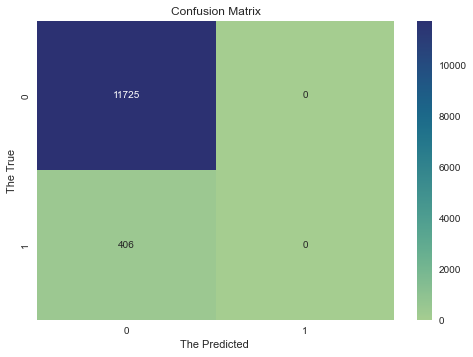

In [446]:
#assess the model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

#conducting the train test split
x_train, x_test, y_train, y_test = train_test_split(z,y, test_size = 0.2, random_state=123)

# Predict responses 
pred_1 = log_reg_1.predict(x_test)


# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))



#confusion matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 

#make a graph for the confusion matrix
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(cm, annot=True, cmap='crest', fmt='g')

#plotting the labels and titles for the axis of the graph
plt.xlabel('The Predicted ')
plt.ylabel('The True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()